<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]

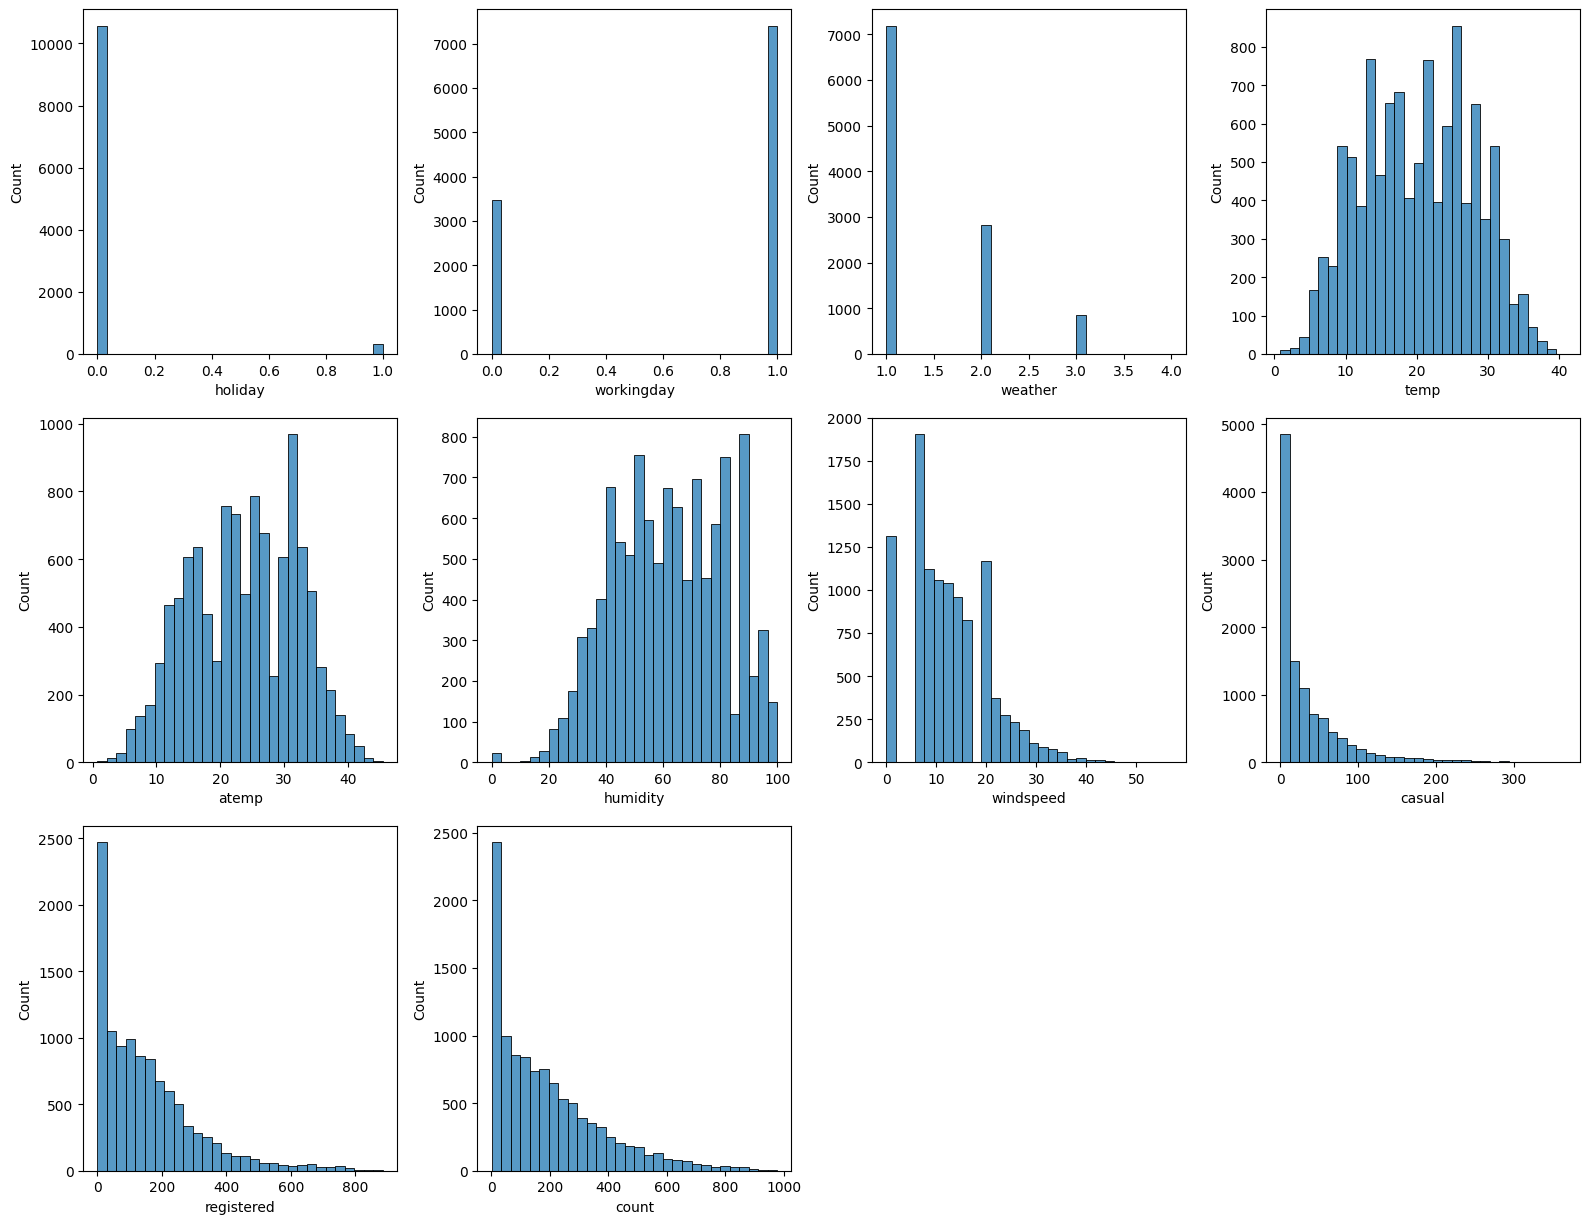

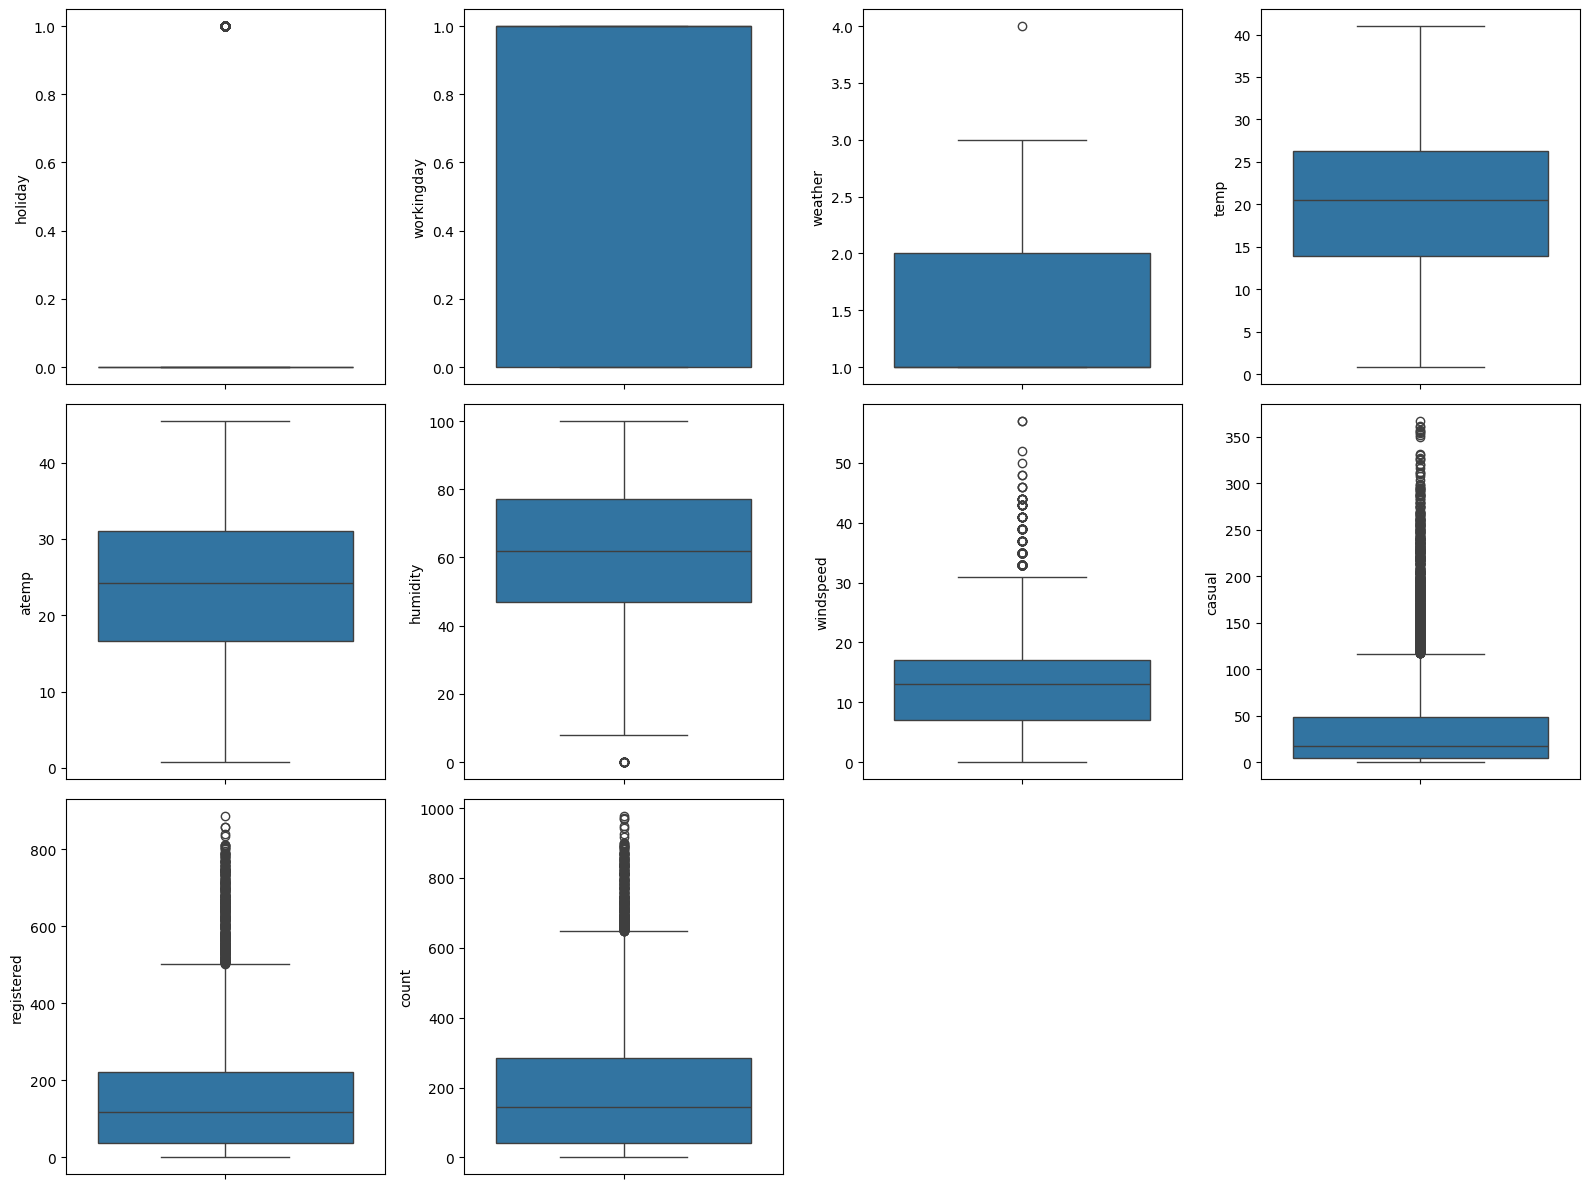

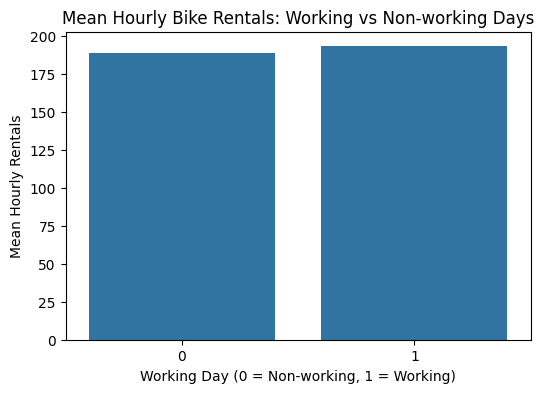

<Figure size 1600x1600 with 0 Axes>

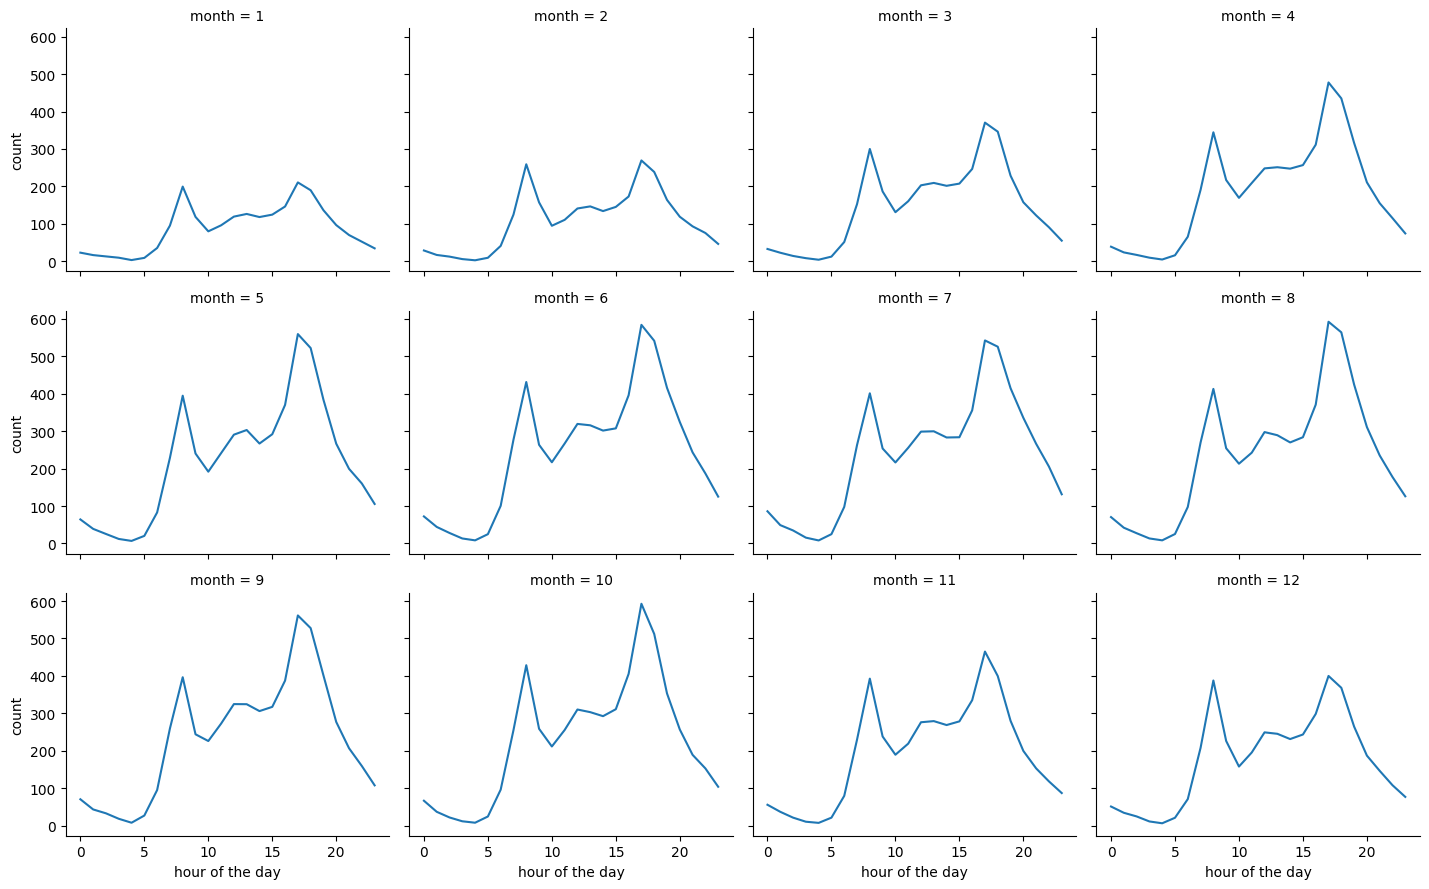

<Figure size 1600x1600 with 0 Axes>

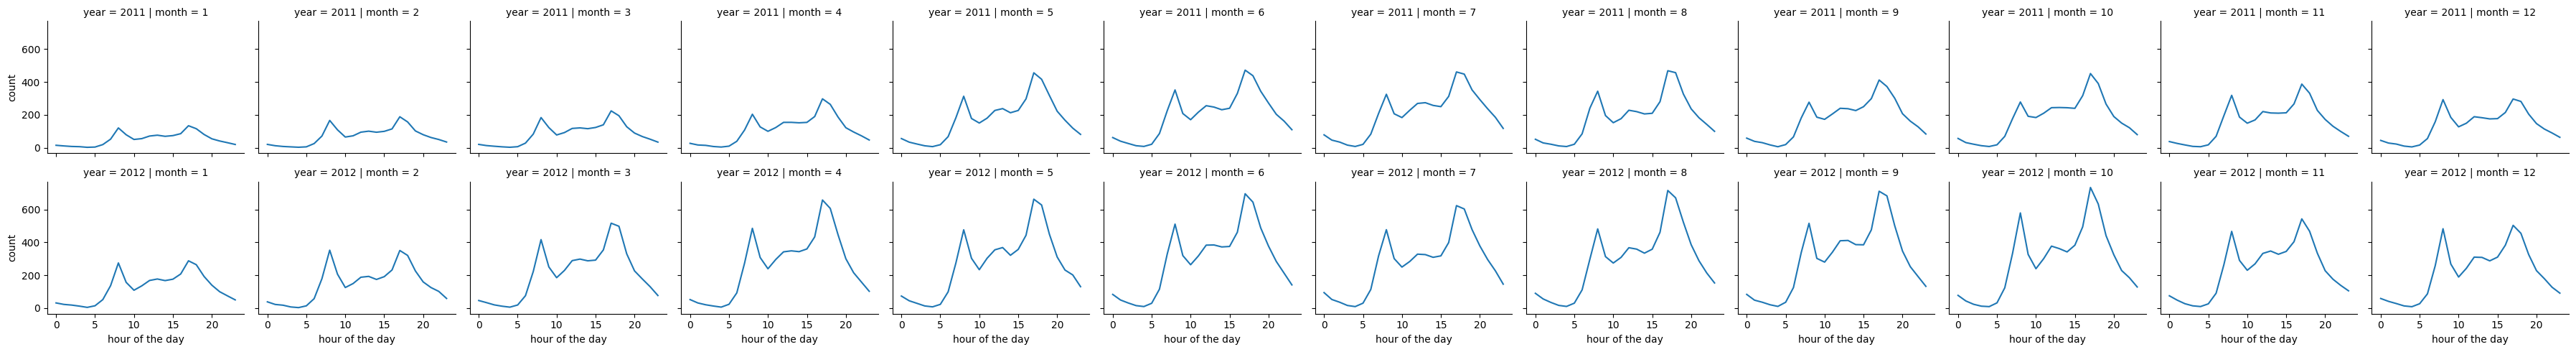

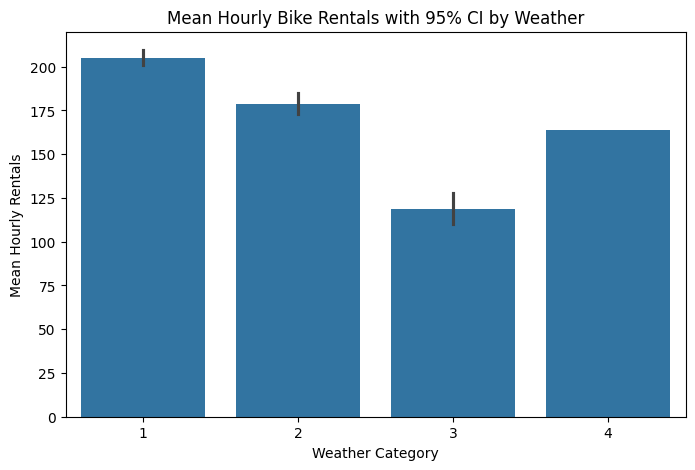

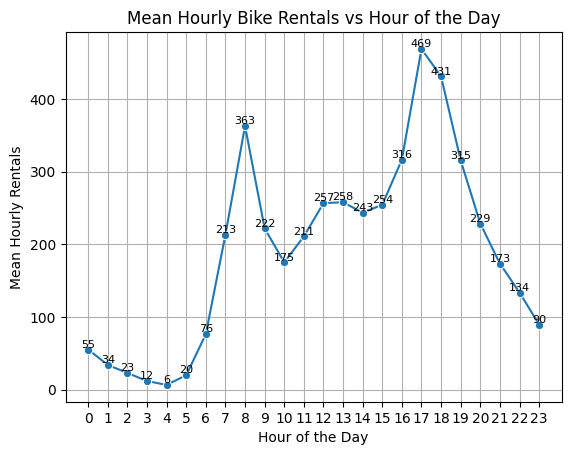

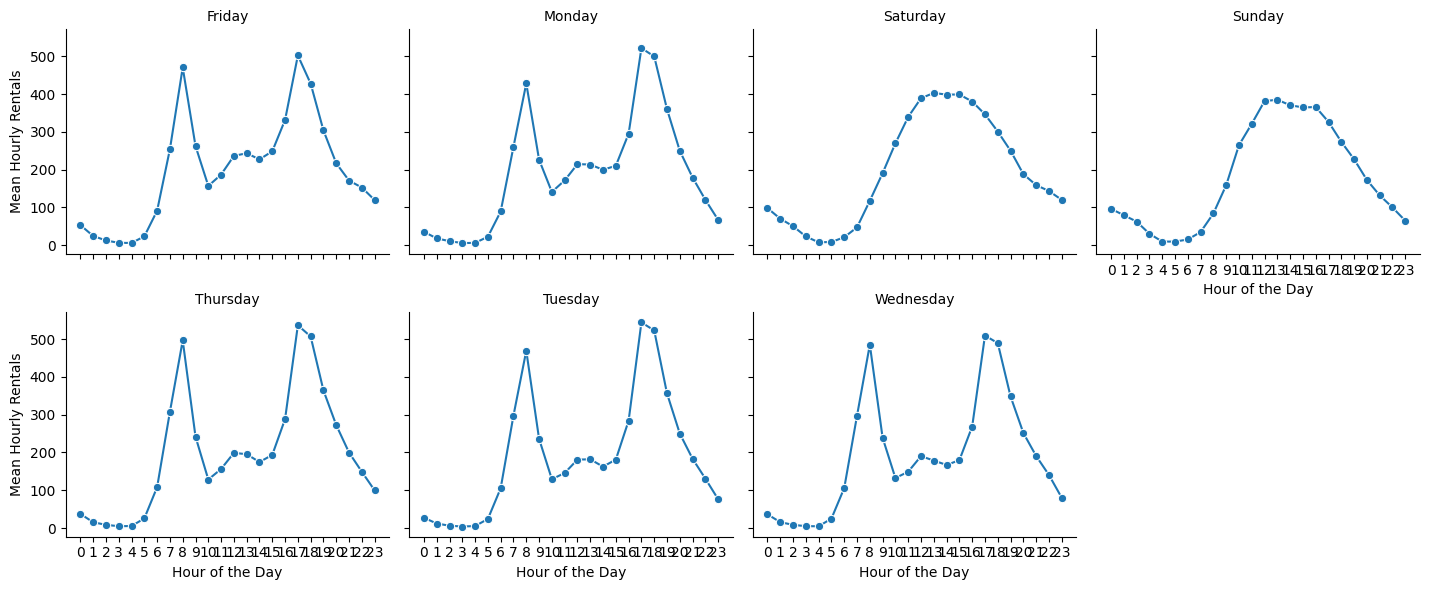

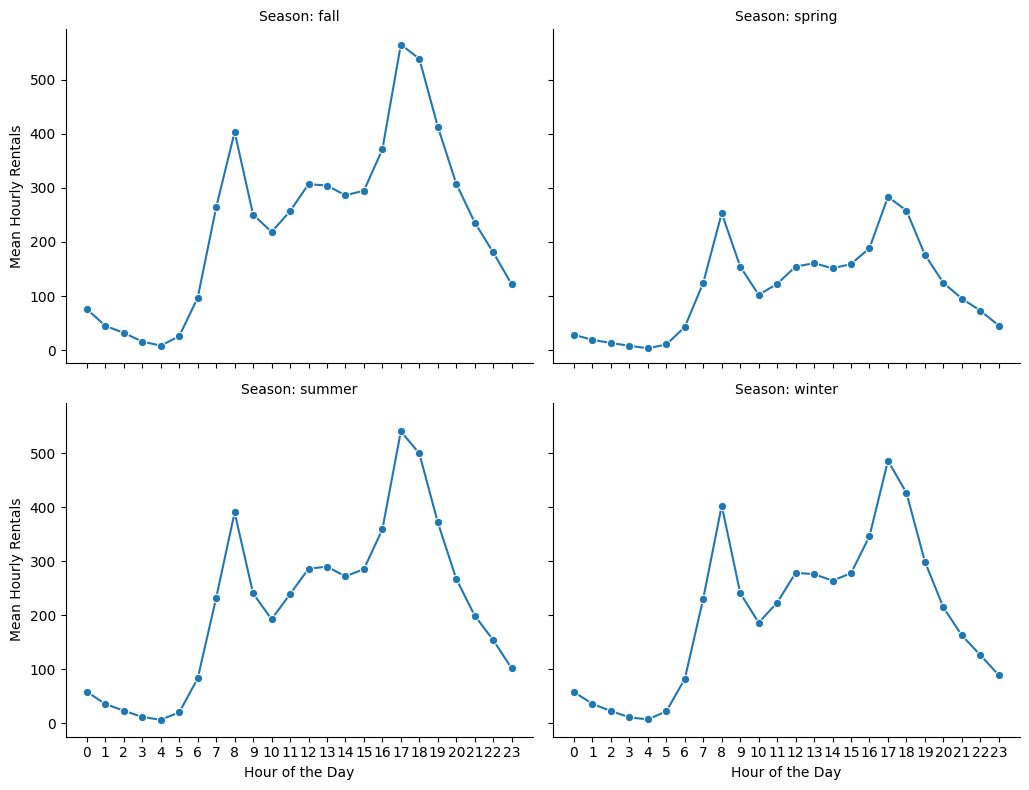

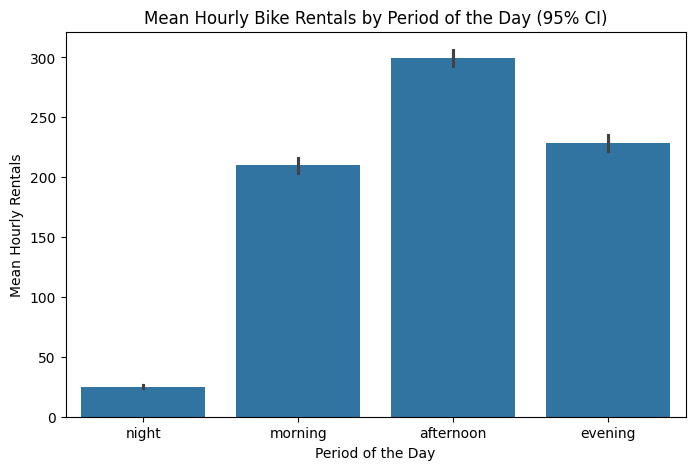

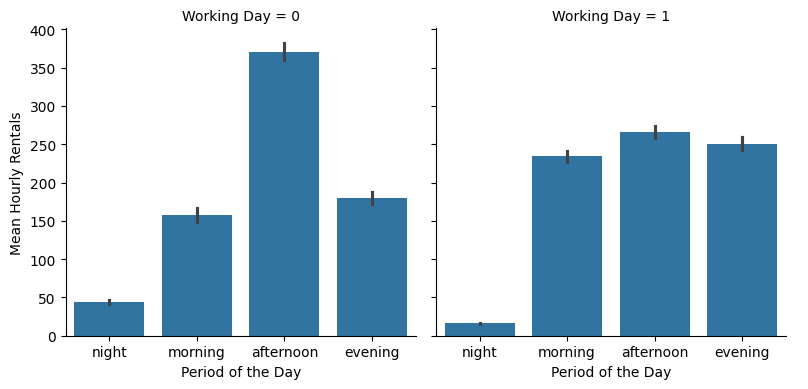

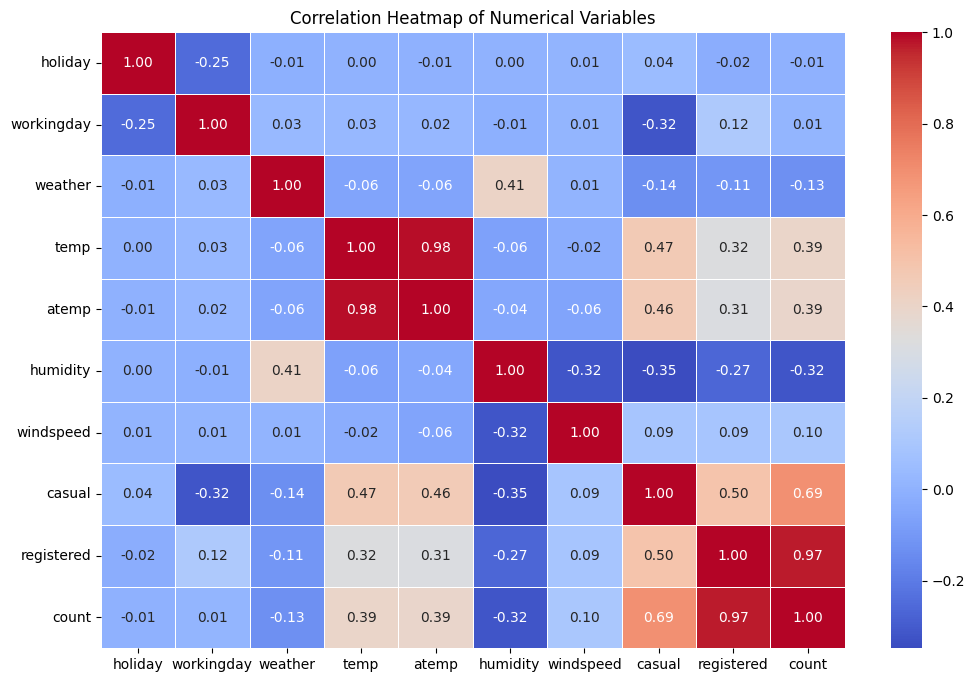

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Import the dataset into a pandas dataframe. Make sure that the date column is in pandas date time format.

# reading raw data from train.csv and storing it in dataframe
df = pd.read_csv('data_set/train.csv')

# verifying the datatypes of the columns using info
df.info()

# as the Dtype of datetime column is object, Explicitly converting it into datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])

# 2. Check the data type of each column. How many rows are there in the dataset ? Does the dataset contain any missing values ?

# checking data types
df.info()

# number of rows
print(f'Number of rows in the provided data set - {len(df)} rows')

# checking for any missing values 
print(f'Number of missing values by data type - \n {df.isna().sum()}')

# 3. Using the date column, create new columns for: year, month, day of the week and hour of the day.

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day of the week'] = df['datetime'].dt.day_of_week
df['hour of the day'] = df['datetime'].dt.hour

# 4.Rename the values in the season column to spring, summer, fall and winter.

df['season'].unique()
# As we have 1,2,3,4 as the values for the season currently, we have to map them with spring, summer, fall and winter (numbers are mapped according to the kaggle dataset information)
'''
 1 -> spring
 2 -> summer
 3 -> fall
 4 -> winter
'''
season_map = {
    1:'spring',
    2:'summer', 
    3:'fall',
    4:'winter'
}

# using pandas map method, we can map existing values of the season column with the new values assigned to them
df['season'] = df['season'].map(season_map)
# df['season'].value_counts()

# 5. Calculate the total number of casual and registered bikes rented in the years 2011 and 2012.

# using groupby on year column to group rows based on years and then applying sum on casual and registered columns
print(f'Total number of casual and registered bikes rented in the years 2011 and 2012 are as follows : \n {df.groupby('year')[['casual', 'registered']].sum()}')

# 6. Calculate the mean of the hourly total rentals count by season. Which season has the highest mean ?
season_wise_hourly_rate_mean = df.groupby('season')['count'].mean()
print(f'Mean of the hourly total rentals count by season \n {season_wise_hourly_rate_mean}')
print(f'The season with the highest mean is - {season_wise_hourly_rate_mean.idxmax()}')

# 7. Are more bikes rented by registered users on working or non-working days ? Does the answer differ for non-registered users ? Is the answer the same for both years ?

registered_summary = df.groupby('workingday')['registered'].sum()
more_bikes_registered = (
    "working days" if registered_summary.idxmax() == 1 else "non-working days"
)
print("More registered user rentals occur on:", more_bikes_registered)


casual_summary = df.groupby('workingday')['casual'].sum()
more_bikes_casual = (
    "working days" if casual_summary.idxmax() == 1 else "non-working days"
)
print("More casual user rentals occur on:", more_bikes_casual)

'''The outcome does differ between registered and casual users. for registered users more bikes were rented during working days and for casual users, more bikes were rented during non-working days
'''

# 8. Which months in the year 2011 have the highest and the lowest total number of bikes rented ? Repeat for the year 2012.

year_and_month_wise_count = df.groupby(['year', 'month'])['count'].sum()

# applying loc method on level 0 (year) on the grouped dataframe and using idxmax, we can get the max count month number
print(f"Month in which the maximum bikes rentals had happened in 2011 is - {year_and_month_wise_count.loc[2011].idxmax()}")

print(f"Month in which the minimum bikes rentals had happened in 2011 is - {year_and_month_wise_count.loc[2011].idxmin()}")

print(f"Month in which the minimum bikes rentals had happened in 2012 is - {year_and_month_wise_count.loc[2012].idxmax()}")
print(f"Month in which the minimum bikes rentals had happened in 2012 is - {year_and_month_wise_count.loc[2012].idxmin()}")

# 9. Which type of weather have the highest and lowest mean of the hourly total rentals count ?

grouped_by_weather = df.groupby('weather')['count'].mean()

weather_names = {
    1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog '
}

weather_with_highes_mean = grouped_by_weather.idxmax()
weather_with_lowest_mean = grouped_by_weather.idxmin()

print(f'The weather with highest mean of hourly total rentals count is {weather_names[weather_with_highes_mean]}')
print(f'The weather with lowest mean of hourly total rentals count is {weather_names[weather_with_lowest_mean]}')

# 10. Calculate the correlation between the hourly total rentals count and all the numerical columns in the dataset. Which column has the highest correlation with the total rentals count ?

# sorting the correlation outcomes in ascending order
correlation_matrix = df.corr(numeric_only=True)['count'].sort_values(ascending=False)
print(f"The column with highest correlation with total rentals count is {correlation_matrix.index[1]}")

''' 11. Create a new categorical column called day_period, which can take four
possible values: night, morning, afternoon and evening. These values
correspond to the following binning of the hour column: 0-6: night, 6-12:
morning, 12-6: afternoon, 6-24:evening. '''

def get_day_period(hour):

    if 0 <= hour < 6:
        return "night"
    elif 6 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    return "evening"

# we can apply this function on hour column and create a new day_perion column 

df['day_period'] = df['hour of the day'].apply(get_day_period)

# 12.  Generate a pivot table for the mean of the hourly total rentals count, with the index set to the day period and the column set to the working day column. What can you observe from the table ?

pivot_table = pd.pivot_table(
    df,
    values='count',
    index='day_period',
    columns='workingday',
    aggfunc='mean'
)

print(f'generated pivot table: \n {pivot_table}')

# assignment 2

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot the distributions of all the numerical columns in the dataset using histograms

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(16,16))

for i,col in enumerate(numeric_cols,1):
    plt.subplot(4,4,i)
    sns.histplot(df[col], bins=30)

plt.tight_layout()
plt.show()

# 2. Plot the distributions of all the numerical columns in the dataset using box plots.

num_of_rows = (len(numeric_cols)//4)+1
plt.figure(figsize=(16, num_of_rows*4))

for i,col in enumerate(numeric_cols,1):
    plt.subplot(num_of_rows,4,i)
    sns.boxplot(y=df[col])

plt.tight_layout()
plt.show()

# 3. Plot the the mean of the hourly total rentals count for working and nonworking days.

mean_rentals_working_and_non_working_days = df.groupby('workingday')['count'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(
    data=mean_rentals_working_and_non_working_days,
    x='workingday',
    y='count'
)

plt.xlabel('Working Day (0 = Non-working, 1 = Working)')
plt.ylabel('Mean Hourly Rentals')
plt.title('Mean Hourly Bike Rentals: Working vs Non-working Days')
plt.show()

# 4. Plot the the mean of the hourly total rentals count for the different months for both years combined.
month_and_hour_wise_mean = df.groupby(['month','hour of the day'])['count'].mean().reset_index()
plt.figure(figsize=(16,16))

# using relational plot to have one lineplot for each month to have a organised graphs
sns.relplot(
    data=month_and_hour_wise_mean,
    x='hour of the day',
    y='count',
    col='month',
    kind='line',
    col_wrap=4,
    height=3,
    aspect=1.2
)

plt.show()

# 5. Plot the the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.

month_year_and_hour_wise_mean = df.groupby(['month','year','hour of the day'])['count'].mean().reset_index()
plt.figure(figsize=(16,16))

# shows all the months of a year as separate plots in one single row with this configuration using relational plot
sns.relplot(
    data=month_year_and_hour_wise_mean,
    x='hour of the day',
    y='count',
    col='month',
    row='year',
    kind='line',
    height=2.5,
    aspect=1.2
)

plt.show()

# 6. Plot the the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories. What can you observe ?

plt.figure(figsize=(8,5))

sns.barplot(
    data=df,
    x='weather',
    y='count',
    estimator='mean',
    errorbar=('ci', 95)

)

plt.xlabel('Weather Category')
plt.ylabel('Mean Hourly Rentals')
plt.title('Mean Hourly Bike Rentals with 95% CI by Weather')

plt.show()

# 7. Plot the the mean of the hourly total rentals count versus the hour of the day. Which hours of the day have the highest rentals count ?

mean_of_hourly_total_rentals = df.groupby('hour of the day')['count'].mean().reset_index()
sns.lineplot(
    data=mean_of_hourly_total_rentals,
    x='hour of the day',
    y='count',
    marker='o'
)

for _,r in mean_of_hourly_total_rentals.iterrows():
    plt.text(
        x=r['hour of the day'],
        y=r['count'],
        s=f"{r['count']:.0f}",
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.xlabel('Hour of the Day')
plt.ylabel('Mean Hourly Rentals')
plt.title('Mean Hourly Bike Rentals vs Hour of the Day')
plt.xticks(range(0, 24))
plt.grid(True)

plt.show()

'''
    Answer: The highest rentals count were observed on 17, 18, 8, 19 hours of the day respectively which indicates that the bike rentals were high during start of the work hour and end of the work hours
'''

# 8. Repeat the plot in 7 for different days of the week. What patterns can you observe ?

days_order = {
    0:'Monday', 1:'Tuesday', 2:'Wednesday',
    3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'
}

df['day of the week'] = df['day of the week'].map(days_order)

hourly_day_mean =  df.groupby(['day of the week', 'hour of the day'])['count'].mean().reset_index()



g = sns.relplot(
    data=hourly_day_mean,
    x='hour of the day',
    y='count',
    col='day of the week',
    col_wrap=4,
    kind='line',
    height=3,
    aspect=1.2,
    marker='o'
)

g.set_axis_labels("Hour of the Day", "Mean Hourly Rentals")
g.set_titles("{col_name}")
g.set(xticks=range(0, 24))
plt.show()

'''
    Answer: Weekdays shows sharp morning and evening peaks may refer to commuting hours, indicating high bike usage.
In contrast, weekends show flatter mornings and higher rental activity during midday and afternoon hours, reflecting recreational use.
'''

# 9. Repeat the plot in 8 for the four seasons using a multi-panel figure. What patterns can you observe ?
hourly_season_mean = (
    df.groupby(['season', 'hour of the day'])['count']
      .mean()
      .reset_index()
)

g = sns.relplot(
    data=hourly_season_mean,
    x='hour of the day',
    y='count',
    col='season',
    kind='line',
    marker='o',
    col_wrap=2,
    height=4,
    aspect=1.3
)

g.set_axis_labels("Hour of the Day", "Mean Hourly Rentals")
g.set_titles("Season: {col_name}")
g.set(xticks=range(0, 24))

plt.show()

'''
    Answer: The multi-panel figure reveals clear seasonal differences in hourly bike rental patterns.
While all seasons exhibit a similar daily structure with morning and evening peaks corresponding to commuting hours, the overall rental volume varies significantly by season.
Summer and fall show the highest rental activity throughout the day, with particularly strong evening peaks, whereas winter exhibits consistently lower demand and weaker peaks.
Spring represents a transitional period with moderate usage.
'''

# 10  Plot the the mean and the 95% confidence interval of the hourly total rentals count versus the period of the day column, which you created in the first part of the assignment. Which period of the day has the highest rentals count ? Does this peak period differ for working and non-working days ?

plt.figure(figsize=(8, 5))

sns.barplot(
    data=df,
    x='day_period',
    y='count',
    estimator='mean',
    errorbar=('ci', 95)
)

plt.xlabel('Period of the Day')
plt.ylabel('Mean Hourly Rentals')
plt.title('Mean Hourly Bike Rentals by Period of the Day (95% CI)')
plt.show()

g = sns.catplot(
    data=df,
    x='day_period',
    y='count',
    col='workingday',
    kind='bar',
    estimator='mean',
    errorbar=('ci', 95),
    height=4,
    aspect=1
)

g.set_axis_labels("Period of the Day", "Mean Hourly Rentals")
g.set_titles("Working Day = {col_name}")

plt.show()


'''
    Answer: The bar plots show that afternoon hours have the highest mean hourly bike rentals overall, while night-time usage is minimal.
When comparing working and non-working days, clear differences were identified.
On non-working days, bike rentals peak strongly in the afternoon, indicating predominantly recreational use.
On working days, rental activity remains high during both the afternoon and evening, reflecting commuting-related travel patterns.
These results demonstrate that the peak rental period varies depending on whether the day is a working or non-working day.
'''

# 11 Plot a heatmap for the correlation matrix of the dataset numerical variables. What observations can you make ?
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

'''
    Answer - The correlation heatmap indicates that total bike rentals are strongly positively correlated with registered users and moderately correlated with casual users, highlighting the dominant contribution of registered riders.
Temperature and apparent temperature show moderate positive correlations with total rentals, suggesting increased bike usage in warmer conditions, while humidity exhibits a moderate negative correlation, indicating reduced demand under humid conditions.
A very strong correlation between temperature and apparent temperature suggests redundancy between these variables.
Variables such as weather category, wind speed, and holiday display relatively weak linear correlations with total rentals, implying more complex, non-linear effects.
Additionally, working days are negatively associated with casual usage but slightly positively associated with registered usage.
'''


